## Sentiment Analysis Model

### Requirements

In [229]:
# !pip install transformers
# !pip install tensorflow
# !pip install -U jupyter
# !pip install ipywidgets
# Link for automodels from tensorflow https://huggingface.co/transformers/v3.0.2/model_doc/auto.html
# !pip install nltk
#!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 10.3 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.4 MB/s eta 0:00:01


### Imports

In [290]:
from transformers import BertTokenizerFast, TFBertForSequenceClassification
from tensorflow.nn import softmax
from tensorflow.keras import Sequential, layers
import pandas as pd
import glob
from big_picture.get_merged_data import get_data
from big_picture import pre_processor
import numpy as np
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Model and base example

In [160]:
tokenizer = BertTokenizerFast.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = TFBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFBertForSequenceClassification: ['pre_classifier', 'dropout_19', 'distilbert']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english an

In [171]:
text = "Replace me by any text you'd like"
encoded_input = tokenizer(text, return_tensors='tf', max_length=500, padding=True, truncation=True)
encoded_input

{'input_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=
array([[ 101, 5672, 2033, 2011, 2151, 3793, 2017, 1005, 1040, 2066,  102]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 11), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [172]:
#output = model(encoded_input)
#output

In [173]:
softmax(output.logits)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.59855133, 0.40144864]], dtype=float32)>

### Basic modelling of our data

In [174]:
REL_PATH_INPUT = "../raw_data/data_12k/"
CONTENT_COL = "content"
DESCRIPTION_COL = "short_description"
HEADLINE_COL = "headline"

news_all_data = "news_all_data"

df =  get_data(REL_PATH_INPUT)
df = df.sample(150)
df[CONTENT_COL] = df[CONTENT_COL].replace('\n',' ', regex=True)

df[news_all_data] = df[CONTENT_COL] + " " + df[DESCRIPTION_COL] + " " + df[HEADLINE_COL]
df = df.dropna(subset=[news_all_data]).reset_index()
df = df[df[news_all_data] != "Invalid file"].reset_index(drop=True)

In [175]:
texts = list(df.news_all_data)

In [176]:
#texts = "Finland has banned the neo-Nazi Nordic Resistance Movement following a court ruling"

In [179]:
encoded_input = tokenizer(texts, 
                          return_tensors='tf',
                          padding=True,
                          max_length=500,
                          truncation=True)

In [180]:
encoded_input['input_ids']

<tf.Tensor: shape=(150, 500), dtype=int32, numpy=
array([[  101,  1523,  2035, ...,  6903,  1997,   102],
       [  101,  1996,  4956, ...,  3639,  1012,   102],
       [  101,  2343,  6221, ...,  1001,  8398,   102],
       ...,
       [  101,  9665, 16095, ...,  2008,  2004,   102],
       [  101,  2899,  1006, ...,  2390,  1998,   102],
       [  101,  2028,  4895, ...,  2617,  2000,   102]], dtype=int32)>

In [150]:
#encoded_input[0].ids
# encoded_input
# When one text:
#{'input_ids': <tf.Tensor: shape=(1, 16), dtype=int32, numpy=
#array([[  101,  6435,  2038,  7917,  1996,  9253,  1011,  6394, 13649,
#         5012,  2929,  2206,  1037,  2457,  6996,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 16), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [181]:
output = model(encoded_input)

In [287]:
output.logits

<tf.Tensor: shape=(150, 2), dtype=float32, numpy=
array([[ 0.06932306, -0.31501985],
       [ 0.07365608, -0.31923977],
       [ 0.05789121, -0.31503582],
       [ 0.08705525, -0.28908417],
       [ 0.06471908, -0.31378955],
       [ 0.08420102, -0.31111145],
       [ 0.08043686, -0.31628042],
       [ 0.06778269, -0.3172796 ],
       [ 0.11504273, -0.31098598],
       [ 0.0625249 , -0.31642586],
       [ 0.07907803, -0.31168836],
       [ 0.07479925, -0.3184858 ],
       [ 0.07000762, -0.3212289 ],
       [ 0.0732241 , -0.31707877],
       [ 0.06349672, -0.33137527],
       [ 0.07572918, -0.3030541 ],
       [ 0.07916172, -0.31141916],
       [ 0.05160999, -0.30852506],
       [ 0.07388616, -0.3171109 ],
       [ 0.06004552, -0.30293843],
       [ 0.02642242, -0.31377515],
       [ 0.06632915, -0.3092785 ],
       [ 0.0541038 , -0.31833202],
       [ 0.05032248, -0.29409397],
       [ 0.05103099, -0.29762328],
       [ 0.06977649, -0.31102416],
       [ 0.05221482, -0.31460345],
     

In [291]:
my_array = softmax(output.logits).numpy()
my_array[0]

array([0.5949201 , 0.40507984], dtype=float32)

In [292]:
df = pd.DataFrame(my_array, columns = ['Negative','Positive'])

In [293]:
print(df['Negative'].mean())
print(df['Positive'].mean())

0.5943471
0.40565285


In [294]:
import matplotlib.pyplot as plt
#plt.hist(df['Negative']) # Check feature distribution
#plt.hist(df['Positive']) # Check feature distribution

In [296]:
df['Result'] = df['Positive'] - df['Negative']
df['Result']

0     -0.189840
1     -0.193959
2     -0.184332
3     -0.185883
4     -0.187027
         ...   
145   -0.194782
146   -0.191415
147   -0.189422
148   -0.191322
149   -0.193712
Name: Result, Length: 150, dtype: float32

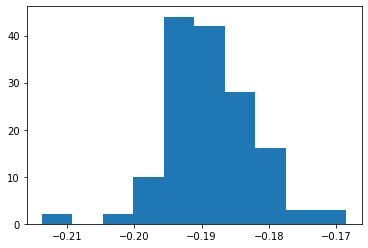

In [297]:
plt.hist(df['Result']); # Check feature distribution

In [305]:
#scaler = MinMaxScaler(feature_range=(-1, 1)) # Instanciate StandarScaler
#scaler.fit(df[['Result']]) # Fit scaler to data
#df['Scaled_Result'] = scaler.transform(df[['Result']]) # Use scaler to transform data

In [304]:
#plt.hist(scaled_df['Negative']) # Check feature distribution
#plt.hist(df['Scaled_Result']); # Check feature distribution